#INTRODUCTION TO PYTORCH

In [1]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [11]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(torch.__version__)
print(torch.cuda.is_available())

2.3.1+cu121
False


# Understanding tensors

In deep learning, a tensor is a multi-dimensional array used to store data. It can be thought of as a generalization of scalars (0D), vectors (1D), and matrices (2D). Tensors are the ultimate data structure for organizing and processing inputs, weights, and outputs in neural networks, allowing for efficient computation and manipulation.  Its is similar to numpy just working as a n multidimensional dimensional array

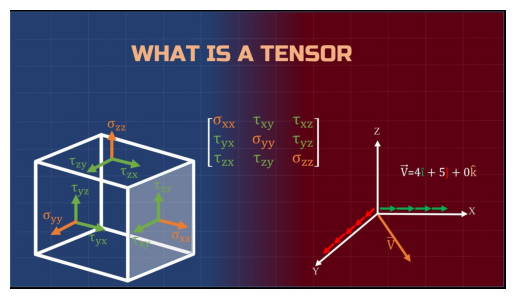

In [12]:
img = mpimg.imread('/content/TENSOR.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

#Scalars, vectors, matrices, and tensors

In [13]:
import torch
import numpy as np

# create a 0D tensor (scalar) from a Python integer
tensor0d = torch.tensor(1)

# create a 1D tensor (vector) from a Python list
tensor1d = torch.tensor([1, 2, 3])

# create a 2D tensor from a nested Python list
tensor2d = torch.tensor([[1, 2],
                         [3, 4]])

# create a 3D tensor from a nested Python list
tensor3d_1 = torch.tensor([[[1, 2], [3, 4]],
                           [[5, 6], [7, 8]]])

# create a 3D tensor from NumPy array
ary3d = np.array([[[1, 2], [3, 4]],
                  [[5, 6], [7, 8]]])
tensor3d_2 = torch.tensor(ary3d)  # Copies NumPy array
tensor3d_3 = torch.from_numpy(ary3d)  # Shares memory with NumPy array

In [7]:
ary3d[0, 0, 0] = 999
print(tensor3d_2) # remains unchanged

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [8]:
print(tensor3d_3) # changes because of memory sharing

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]])


# Tensor data types

In [14]:
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)

torch.int64


In [15]:
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)

torch.float32


In [16]:
floatvec = tensor1d.to(torch.float32)
print(floatvec.dtype)

torch.float32


# Common PyTorch tensor operations

In [61]:
tensor2d = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor2d

# tensor2d.shape

tensor2d.reshape(3, 2)

# tensor2d.view(3, 2)

tensor2d.T

# tensor2d.matmul(tensor2d.T)

# tensor2d @ tensor2d.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

# Seeing models as computation graphs

In [62]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w1 = torch.tensor([2.2]) # weight parameter
b = torch.tensor([0.0])  # bias unit

z = x1 * w1 + b          # net input
a = torch.sigmoid(z)     # activation & output

loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


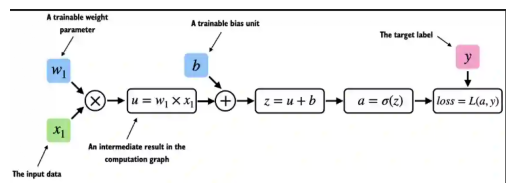

In [22]:
img = mpimg.imread('/content/model.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

# Automatic differentiation

In [66]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [67]:
loss.backward()

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


# Implementing multilayer neural networks

In [25]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [26]:
model = NeuralNetwork(50, 3)

In [27]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [28]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


In [29]:
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0731, -0.0365, -0.0594,  ..., -0.0265,  0.0283,  0.0937],
        [ 0.0751,  0.0648, -0.0571,  ...,  0.0622, -0.0954,  0.0051],
        [-0.0246, -0.0868, -0.0649,  ...,  0.1209, -0.0782,  0.1001],
        ...,
        [ 0.0242, -0.0126, -0.0804,  ...,  0.0808,  0.0619,  0.0564],
        [-0.0282, -0.0840,  0.1344,  ...,  0.0720,  0.0151, -0.0970],
        [-0.0479, -0.0474,  0.0752,  ...,  0.0477,  0.0956, -0.0193]],
       requires_grad=True)


In [30]:
torch.manual_seed(123)

model = NeuralNetwork(50, 3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [31]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [32]:
torch.manual_seed(123)

X = torch.rand((1, 50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [33]:
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [34]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


# Setting up efficient data loaders

In [46]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

len(train_ds)

5

In [40]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

In [41]:
test_ds = ToyDataset(X_test, y_test)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

In [42]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


In [43]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

In [45]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[-0.9000,  2.9000],
        [ 2.3000, -1.1000]]) tensor([0, 1])
Batch 2: tensor([[ 2.7000, -1.5000],
        [-0.5000,  2.6000]]) tensor([1, 0])


# A typical training loop

In [47]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels) # Loss function

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

Epoch: 001/003 | Batch 000/002 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train/Val Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train/Val Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train/Val Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train/Val Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train/Val Loss: 0.00


In [48]:
model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


In [49]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])
tensor([0, 0, 0, 1, 1])


In [50]:
predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [51]:
predictions == y_train

tensor([True, True, True, True, True])

In [52]:
torch.sum(predictions == y_train)

tensor(5)

In [53]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [54]:
compute_accuracy(model, train_loader)

1.0

In [55]:
compute_accuracy(model, test_loader)

1.0

# Saving and loading models

In [56]:
torch.save(model.state_dict(), "model.pth")

In [57]:
model = NeuralNetwork(2, 2) # needs to match the original model exactly
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>